In [1]:
# Trying to prediect if the Salary is greater than 50k or less than 50k.
# trying to measure impacts of different features on salary, such as (occupation, education, race, age, sex, marital-status, and more...)

In [2]:
#Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading and loading the data of the CSV file
df = pd.read_csv("salary.csv")

#Previewing of the first 5 rows of data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Describing statistical information of data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#Giving information about columns and dataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Showing numbers of rows and columns of data
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 32561, Columns: 15


In [7]:
#Showing columns of data
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [8]:
#Showing uniques elements in dataframe
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [9]:
#Cleaning the data

#Replacing ? values with null value
df.replace(' ?' , np.nan ,inplace=True)

#Showing total of null values
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [10]:
# Filling the null values by MODE method

df['workclass'].fillna(df['workclass'].mode()[0] , axis=0 ,inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0] , axis=0 ,inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0] , axis=0 ,inplace=True)

In [11]:
#Continuing to Clean the data
# Removing duplicated values 
df.drop_duplicates(inplace=True)

#Removing null values (If there is still any null values)
df = df.dropna(how="any")

#Now data is cleaned

C:\Users\leila\AppData\Local\Temp\ipykernel_16596\827584876.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


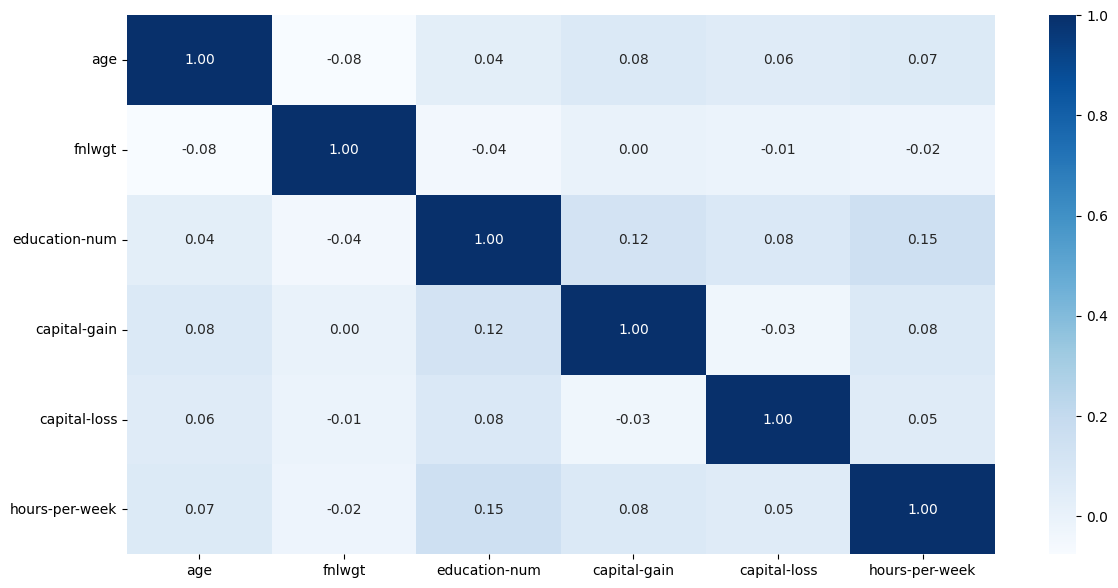

In [12]:
#Corrolation
corr = df.corr()
plt.figure(figsize = (14,7))
sns.heatmap(corr, annot = True, cmap = 'Blues',fmt=".2f")
plt.rcParams['font.size'] = 11
plt.show()

In [13]:
#Converting the salary above 50k to 1 and salary below 50k to 0
df = df.replace([">50K", "<=50K"], [0, 1], regex = True)

Text(0.5, 1.0, 'Salaries comparison for Male and Female')

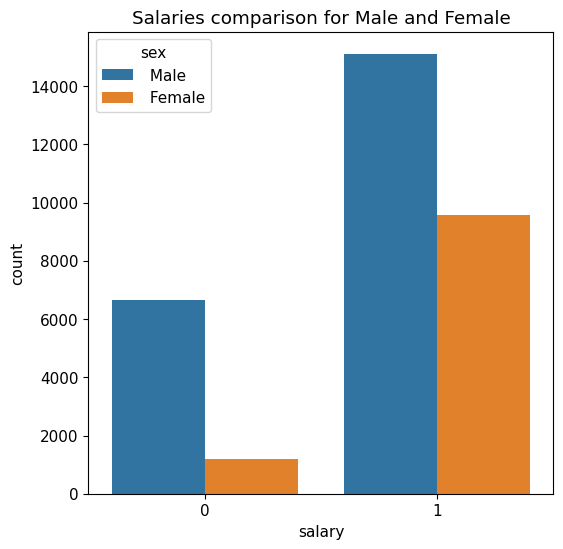

In [14]:
#Visualizing the data 
# Comparing sallary according to sex
#It shows that man recive more salary compared to women
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='salary', hue='sex').set_title('Salaries comparison for Male and Female')

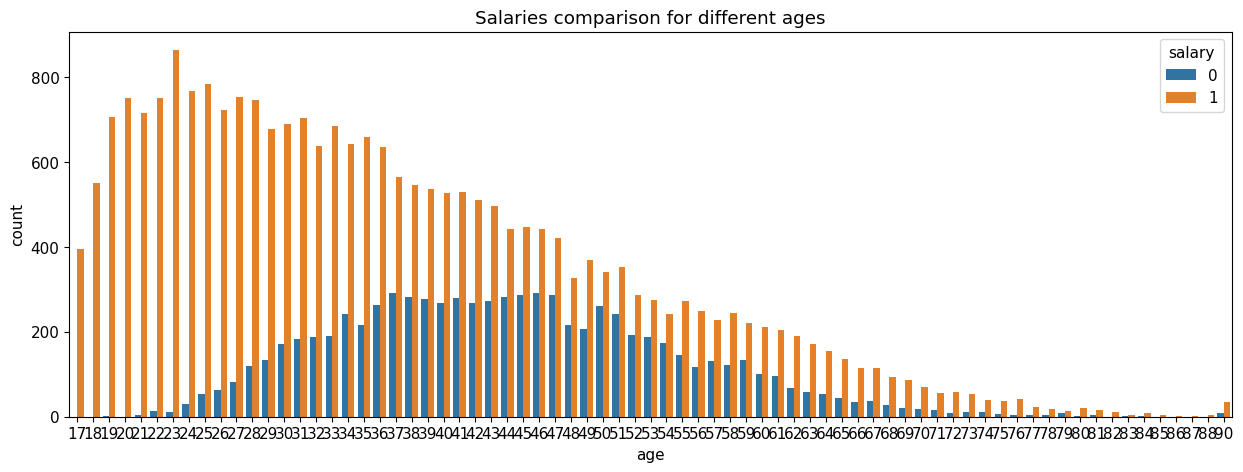

In [15]:
#Comparing sallary for different ages
#It shows that man older than 56 years old get less salary
plt.figure(figsize=(15,5))
sns.countplot(data = df , x = 'age' ,hue='salary').set_title('Salaries comparison for different ages')
plt.rcParams['font.size'] = 8
plt.show()

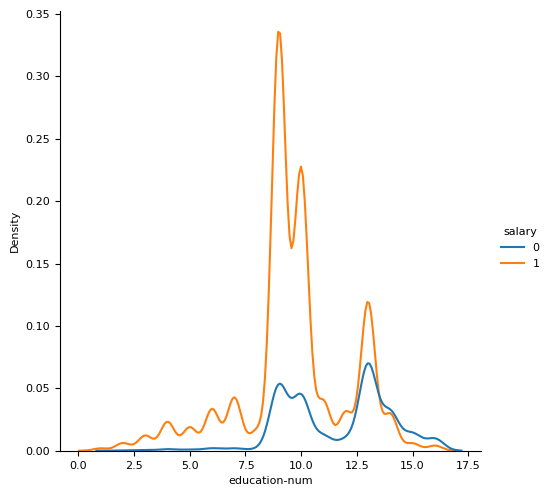

In [16]:
#Comparing salary according to eduction_num
#It shows people whith higher education get more salary compared with people with lower education
sns.displot(data=df, x="education-num", hue="salary", kind="kde")

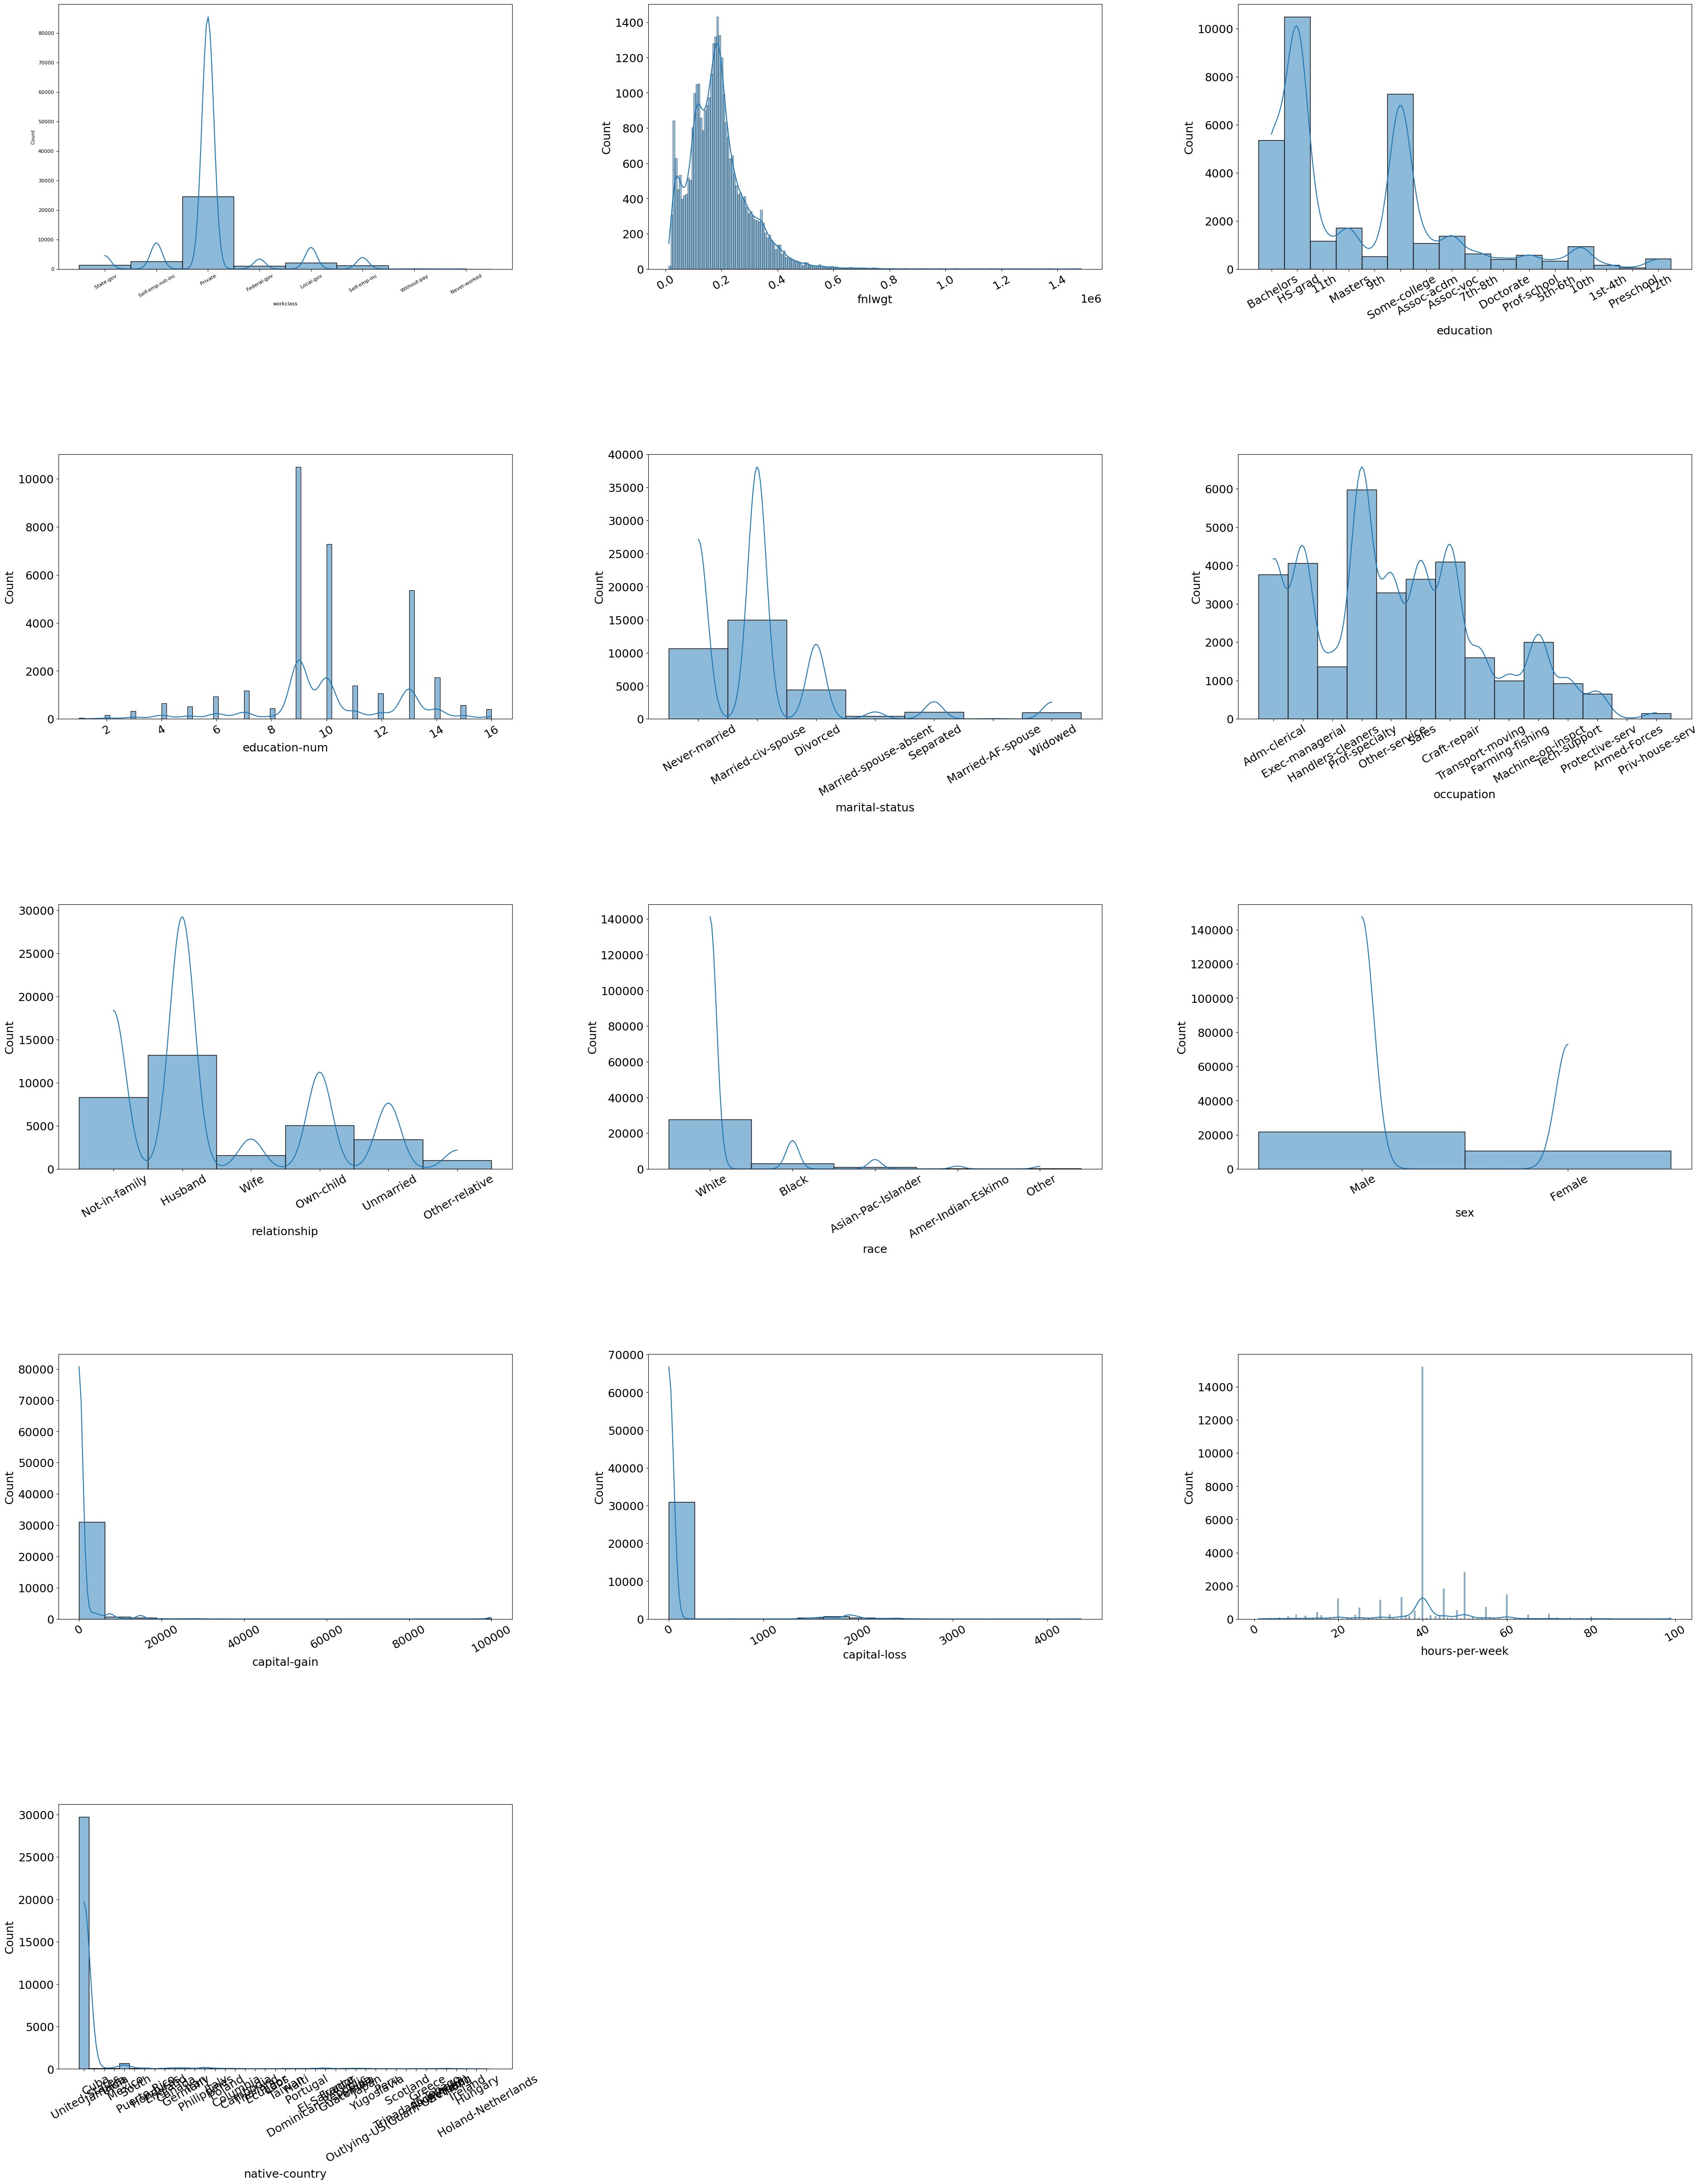

In [17]:
#Visualizing the data 
from scipy.stats import norm

plt.figure(figsize=(45, 35))


for i in range(1, len(df.columns)-1):
    plt.subplot(5,3, i)
    sns.histplot(df[df.columns[i]], kde=True)
    plt.xticks(rotation =30)
    plt.rcParams['font.size'] = 18
    #set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=1.5,
                    wspace=0.3,
                    hspace=0.7)

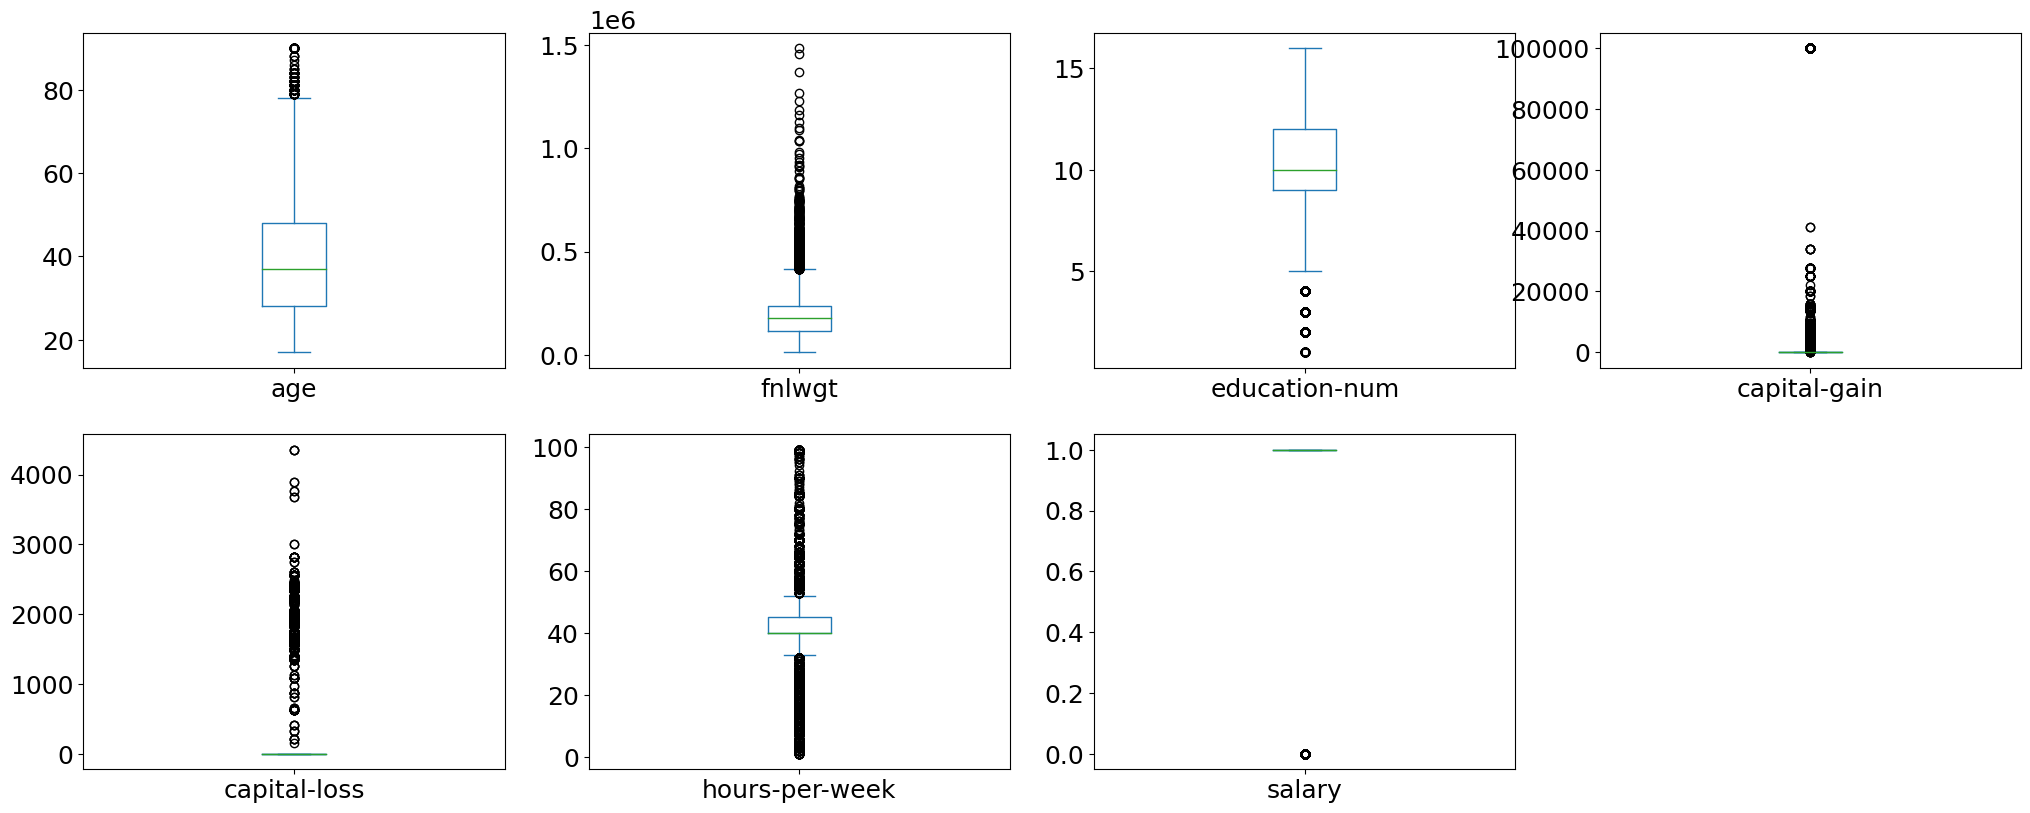

In [18]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (25,20) ,  layout = (4,4))
plt.show()

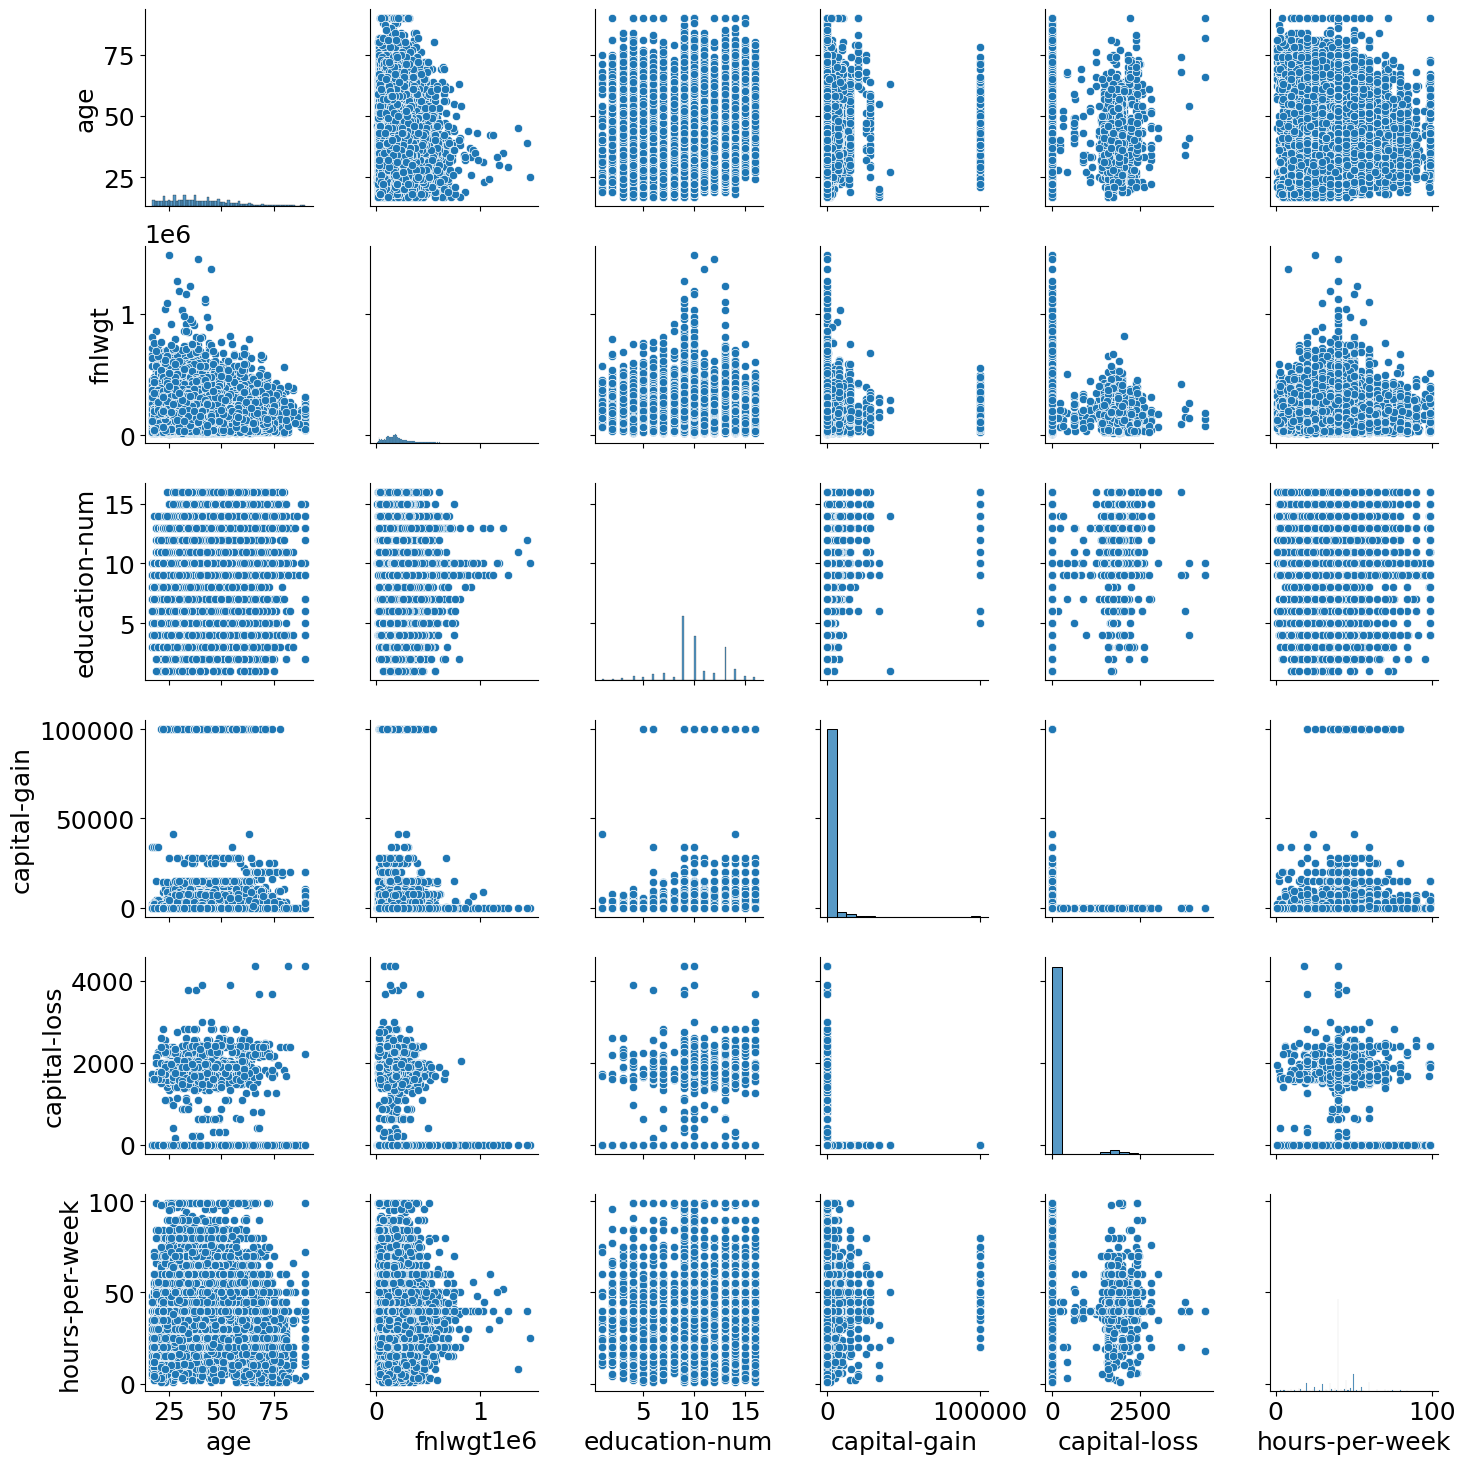

In [19]:
sns.pairplot(df.drop("salary", axis=1))
plt.show()

In [20]:
# Formatting [ marital-status ] column
df['marital-status'] =  df['marital-status'].replace(['Married-spouse-absent','Married-civ-spouse' , 'Married-AF-spouse' ] , 1)
df['marital-status'] =  df['marital-status'].replace(['Divorced' , 'Widowed' ,'Separated'  ] , -1)
df['marital-status'] =  df['marital-status'].replace(['Never-married'] , 0)

In [21]:
#Removing unreasonable or useless data according to visualized data

# Dropping categorical education column which is present by education-num
df.drop("education",   axis=1, inplace=True)

#Droping workclass and fnlwgt columns because they have very litte impact on salary, so I drop them too
df.drop("workclass",   axis=1, inplace=True)
df.drop("fnlwgt",   axis=1, inplace=True)

#It is not reasonable being so young and getting salary more than 50k so I dorp this data
df_child = df[(df.age <=19)&(df['salary'] ==' >50K')]
df.drop(df.loc[df_child.index].index,axis=0,inplace=True)

#It is not reasonable being so old and working more than 50 hours so I drop this data
df_old = df[(df.age >= 75)&(df['hours-per-week'] >=50)]
df.drop(df_old.index, inplace = True)

In [22]:
#Identify categorical columns
cat_columns = df.select_dtypes(['object']).columns
#Transforming all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

df

#--------------------------------
# #Second way:
# from sklearn.preprocessing import OneHotEncoder

# #Selecting categorical columns
# categorical_features = []
# for col in df.columns:
#   if (df[col].dtypes == 'Object'):
#      categorical_features.append(col)
# #Transforming and Labeling non-numberical labels (categorical columns)
# df=pd.get_dummies(df , columns=categorical_features , drop_first=True)
#-------------------------------


# #Third way:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder
# lab_enc = LabelEncoder()
# df['workclass'] = lab_enc.fit_transform(df['workclass'])
# df['race'] = lab_enc.fit_transform(df['race'])
# df['sex'] = lab_enc.fit_transform(df['sex'])
# df['education'] = lab_enc.fit_transform(df['education'])
# df['occupation'] = lab_enc.fit_transform(df['occupation'])
# df['native-country'] = lab_enc.fit_transform(df['native-country'])
# df['marital-status'] = lab_enc.fit_transform(df['marital-status'])
# df['relationship'] = lab_enc.fit_transform(df['relationship'])
# df['salary'] = lab_enc.fit_transform(df['salary'])

,age,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,13,0,0,0,0,0,2174,0,40,0,1
1,50,13,1,1,1,0,0,0,0,13,0,1
2,38,9,2,2,0,0,0,0,0,40,0,1
3,53,7,1,2,1,1,0,0,0,40,0,1
4,28,13,1,3,2,1,1,0,0,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,1,10,2,0,1,0,0,38,0,1
32557,40,9,1,9,1,0,0,0,0,40,0,0
32558,58,9,6,0,4,0,1,0,0,40,0,1
32559,22,9,0,0,3,0,0,0,0,20,0,1


In [23]:
# Formatting [ marital-status ] column
df['marital-status'] =  df['marital-status'].replace(['Married-spouse-absent','Married-civ-spouse' , 'Married-AF-spouse' ] , 1)
df['marital-status'] =  df['marital-status'].replace(['Divorced' , 'Widowed' ,'Separated'  ] , -1)
df['marital-status'] =  df['marital-status'].replace(['Never-married'] , 0)

In [24]:
#Splitting the dataset into the Training set and Testing set 

#Removing dependent column from data and selecting independen features
x= df.drop("salary" ,axis = 1)

#Selecting dependent features
y= df['salary']

In [25]:
#  Spliting Data to Training and Testing parts

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=5)

In [26]:
x_train.head()


,age,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
20397,30,9,2,4,4,0,1,0,0,32,0
4604,26,11,4,0,4,0,1,0,0,35,0
12776,39,13,0,1,0,0,1,0,0,35,0
19022,37,13,1,3,1,0,0,0,0,5,0
16784,47,4,1,6,1,0,0,0,0,40,0


In [27]:
%%time
#Training model by LogisticRegression Algoritm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

loR_clr = LogisticRegression(max_iter=1000, solver="liblinear", multi_class="ovr")
loR_clr.fit(x_train, y_train)

#Score
y_pred = loR_clr.predict(x_test)
print(y_pred)
print("Accuracy:", accuracy_score(y_pred, y_test))
print("precision:" , metrics.precision_score(y_test, y_pred))
print("Recall:" , metrics.recall_score(y_test, y_pred))


[1 1 0 ... 1 1 1]
Accuracy: 0.8219283407658003
precision: 0.8378523011059579
Recall: 0.9496562879094218
CPU times: total: 188 ms
Wall time: 364 ms


In [28]:
%%time
#Training model by DecisionTreeClassifier Algoritm
from sklearn.tree import DecisionTreeClassifier

dt_clr = DecisionTreeClassifier()
dt_clr.fit(x_train, y_train)

# score
y_pred =dt_clr.predict(x_test)
print(y_pred)

print("Accuracy:", accuracy_score(y_pred, y_test))
print("precision:" , metrics.precision_score(y_test, y_pred))
print("Recall:" , metrics.recall_score(y_test, y_pred))

[1 1 1 ... 1 1 1]
Accuracy: 0.8157773335383669
precision: 0.8835448219402374
Recall: 0.8728265264860493
CPU times: total: 78.1 ms
Wall time: 164 ms


In [29]:
%%time
#Training model by RandomForestClassifier Algoritm
from sklearn.ensemble import RandomForestClassifier


rf_clr = RandomForestClassifier(n_estimators=500, random_state=24, max_depth=50)
rf_clr.fit(x_train, y_train)

# score
y_pred = rf_clr.predict(x_test)
print(y_pred)
print("Accuracy:", accuracy_score(y_pred, y_test))
print("precision:" , metrics.precision_score(y_test, y_pred))
print("Recall:" , metrics.recall_score(y_test, y_pred))


#Saving the model
import pickle
pickle.dump(rf_clr, open('model_prediction.pickle', 'wb'))

[1 1 1 ... 1 1 1]
Accuracy: 0.8486852222051361
precision: 0.8827279752704791
Recall: 0.9237767893247069
CPU times: total: 6.23 s
Wall time: 15.1 s


In [30]:
# Conclusion

# I used Classification algorithm for solving the problem and getting prediction of the salary. I tried three models of classification algorithm. 
# -RandomForestClassifier
# -DecisionTreeClassifier
# -LogisticRegression

# all the three models have hight accurey above 80 percentage.
# if higher performance and precision are important DecisionTreeClassifier type is the best.
# if accuracy is important RandomForestClassifier type is the best.
